# ***SCRAPING DATA***

In [ ]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.6 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import reviews, Sort

# Package JobStreet
app_id = 'com.jobstreet.jobstreet'

def get_reviews(app_id, lang='id', count=10000, sort=Sort.NEWEST,
                filter_score_with=None, filter_device_with=None, continuation_token=None):
    try:
        result, continuation_token = reviews(
            app_id,
            lang=lang,
            country='id',
            sort=sort,
            count=count,
            filter_score_with=filter_score_with,
            filter_device_with=filter_device_with,
            continuation_token=continuation_token
        )

        return result, continuation_token

    except Exception as e:
        print("Error:", e)
        return None, None

# Ambil review
reviews_data, continuation_token = get_reviews(app_id)

# Output
if reviews_data is not None:
    print("Jumlah ulasan:", len(reviews_data))
    if len(reviews_data) > 0:
        print("Contoh ulasan:")
        print(reviews_data[0])
else:
    print("Tidak dapat mengambil ulasan.")


Jumlah ulasan: 10000
Contoh ulasan:
{'reviewId': 'f8529f31-0393-4def-bf5e-d28cf1a7dc5b', 'userName': 'Pengguna Google', 'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g', 'content': 'dari tahun 2022 - 2025 belum pernah sekalipun nyantol ke perusahaan sekedar interview saja kgk pernah.', 'score': 1, 'thumbsUpCount': 0, 'reviewCreatedVersion': '14.49.0', 'at': datetime.datetime(2025, 11, 29, 3, 30, 43), 'replyContent': None, 'repliedAt': None, 'appVersion': '14.49.0'}


In [ ]:
import csv

def simpan_ulasan_ke_csv(data_ulasan, nama_file="ulasan_jobstreet.csv"):
    if not data_ulasan:
        print("Tidak ada ulasan yang bisa disimpan.")
        return

    kolom = ["Review ID", "Username", "Rating", "Review Text", "Date"]

    try:
        with open(nama_file, "w", encoding="utf-8", newline="") as berkas:
            tulis = csv.writer(berkas)
            tulis.writerow(kolom)

            for item in data_ulasan:
                baris = [
                    item.get("reviewId"),
                    item.get("userName"),
                    item.get("score"),
                    item.get("content"),
                    item.get("at")
                ]
                tulis.writerow(baris)

        print(f"File berhasil dibuat: {nama_file}")

    except Exception as e:
        print("Gagal menyimpan data:", e)

# Simpan hasil scraping
simpan_ulasan_ke_csv(reviews_data)


File berhasil dibuat: ulasan_jobstreet.csv


In [ ]:
import pandas as pd

# Membaca file hasil scraper JobStreet
df = pd.read_csv("ulasan_jobstreet.csv", encoding="utf-8")

# Menampilkan tabel
df


,Review ID,Username,Rating,Review Text,Date
0,f8529f31-0393-4def-bf5e-d28cf1a7dc5b,Pengguna Google,1,dari tahun 2022 - 2025 belum pernah sekalipun ...,2025-11-29 03:30:43
1,93ef22d0-6d73-44f7-a7ec-23cc9303b66f,Pengguna Google,3,mantap,2025-11-29 03:09:50
2,1396b619-fdbd-4ba0-a9a1-e6f09046ee2e,Pengguna Google,5,"very good app,hope this app helping me for work",2025-11-29 01:59:57
3,b2054228-074c-4736-9094-a89ee05fe244,Pengguna Google,1,"Fake vacancy, dah kirim ratusan, interview 1 p...",2025-11-28 21:21:01
4,dee206c6-1732-4792-ace9-1809050e7036,Pengguna Google,1,jadi app dengan penipuan loker paling banyak 😌,2025-11-28 15:39:23
...,...,...,...,...,...
9995,802210c1-d2f1-430d-a211-642c1b1546f9,Arif Budiman,5,KASIH KERJA DONG,2023-06-22 13:04:41
9996,fabb82ed-1aa7-46e6-8eae-6f532c66b451,dede ahmad Mulyana,5,Mantap...update,2023-06-22 12:23:11
9997,5306d026-3404-4766-bfbe-e5adeaefa6c1,Jodi kuhibiniu,5,Bagus,2023-06-22 11:24:57
9998,1832f08b-8fd6-4ede-8fbf-e6181898d9f9,udin saepudin,5,memudahkan untuk mencari loker,2023-06-22 10:30:06


# ***PRE-PROCESSING DATA***

In [ ]:
# Membaca file ulasan Shopee
df = pd.read_csv("ulasan_jobstreet.csv", encoding="utf-8")

# Menampilkan 5 data awal
df.head()


,Review ID,Username,Rating,Review Text,Date
0,f8529f31-0393-4def-bf5e-d28cf1a7dc5b,Pengguna Google,1,dari tahun 2022 - 2025 belum pernah sekalipun ...,2025-11-29 03:30:43
1,93ef22d0-6d73-44f7-a7ec-23cc9303b66f,Pengguna Google,3,mantap,2025-11-29 03:09:50
2,1396b619-fdbd-4ba0-a9a1-e6f09046ee2e,Pengguna Google,5,"very good app,hope this app helping me for work",2025-11-29 01:59:57
3,b2054228-074c-4736-9094-a89ee05fe244,Pengguna Google,1,"Fake vacancy, dah kirim ratusan, interview 1 p...",2025-11-28 21:21:01
4,dee206c6-1732-4792-ace9-1809050e7036,Pengguna Google,1,jadi app dengan penipuan loker paling banyak 😌,2025-11-28 15:39:23


# ***CLEANING COLOMN***

In [ ]:
df = pd.read_csv("ulasan_jobstreet.csv", encoding="utf-8")

# Samakan nama kolom agar konsisten
df = df.rename(columns={
    "Review ID": "ReviewID",
    "Review Id": "ReviewID",
    "Review Text": "ReviewText",
    "content": "ReviewText",
    "Content": "ReviewText",
})

# Ambil hanya 2 kolom
df2 = df[["Rating", "ReviewText"]]

df2.head()


,Rating,ReviewText
0,1,dari tahun 2022 - 2025 belum pernah sekalipun ...
1,3,mantap
2,5,"very good app,hope this app helping me for work"
3,1,"Fake vacancy, dah kirim ratusan, interview 1 p..."
4,1,jadi app dengan penipuan loker paling banyak 😌


# ***CLEANING TEXT***

In [ ]:
df = pd.read_csv("ulasan_jobstreet.csv", encoding="utf-8")

# Samakan nama kolom agar konsisten
df = df.rename(columns={
    "Review ID": "ReviewID",
    "Review Id": "ReviewID",
    "Review Text": "ReviewText",
    "content": "ReviewText",
    "Content": "ReviewText",
})

# Ambil hanya 2 kolom
df2 = df[["Rating", "ReviewText"]]

df2.head()


,Rating,ReviewText
0,1,dari tahun 2022 - 2025 belum pernah sekalipun ...
1,3,mantap
2,5,"very good app,hope this app helping me for work"
3,1,"Fake vacancy, dah kirim ratusan, interview 1 p..."
4,1,jadi app dengan penipuan loker paling banyak 😌


 # ***TRANSLATE REVIEW NON INDONESIA using IndoBERT Model***

In [ ]:
# ============================================
# 1. Install Library (jalankan sekali)
# ============================================
!pip install deep-translator tqdm --quiet

# ============================================
# 2. Import Library
# ============================================
import pandas as pd
from deep_translator import GoogleTranslator
from tqdm import tqdm

# ============================================
# 3. Load Dataset & Samakan Nama Kolom
# ============================================
df = pd.read_csv("ulasan_jobstreet.csv", encoding="utf-8")

df = df.rename(columns={
    "Review ID": "ReviewID",
    "Review Id": "ReviewID",
    "Review Text": "ReviewText",
    "content": "ReviewText",
    "Content": "ReviewText",
})

df2 = df[["Rating", "ReviewText"]].copy()

df2 = df2.dropna(subset=["ReviewText"])
df2 = df2[df2["ReviewText"].str.strip() != ""]
df2.reset_index(drop=True, inplace=True)


# ============================================
# 4. Translate Semua Review ke Bahasa Indonesia
# ============================================
tqdm.pandas(desc="Menerjemahkan Review ke Bahasa Indonesia")

def translate_to_indonesian(text):
    try:
        return GoogleTranslator(source='auto', target='id').translate(text)
    except:
        return text  # jika gagal, tetap pakai aslinya

df2["ReviewText_Indo"] = df2["ReviewText"].progress_apply(translate_to_indonesian)


# ============================================
# 5. Simpan Hasil
# ============================================
df2.to_excel("Ulasan_Jobstreet_Translated.xlsx", index=False)

df2.head(10)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.5 MB/s eta 0:00:00


Menerjemahkan Review ke Bahasa Indonesia: 100%|██████████| 10000/10000 [36:54<00:00,  4.52it/s]


,Rating,ReviewText,ReviewText_Indo
0,1,dari tahun 2022 - 2025 belum pernah sekalipun ...,dari tahun 2022 - 2025 belum pernah sekalipun ...
1,3,mantap,padat
2,5,"very good app,hope this app helping me for work","aplikasi yang sangat bagus, semoga aplikasi in..."
3,1,"Fake vacancy, dah kirim ratusan, interview 1 p...","Fake vacancy, dah kirim ratusan, interview 1 p..."
4,1,jadi app dengan penipuan loker paling banyak 😌,jadi app dengan penipuan loker paling banyak 😌
5,1,sekarang jobstreet sepi. tidak bnyk perusahaan...,sekarang jobstreet sepi. tidak bnyk perusahaan...
6,1,tampilannya membingungkan,tampilannya membingungkan
7,4,baik,baik
8,5,puas,kerusakan
9,5,Sangat membantu kani yng sedang mencari lowong...,Sangat membantu kani yng sedang mencari lowong...


 # ***Menghitung persentase Rating+Komen***

In [ ]:
import pandas as pd

# Data kamu
df = pd.read_csv("ulasan_jobstreet.csv", encoding="utf-8")

# Samakan kolom
df = df.rename(columns={
    "Review ID": "ReviewID",
    "Review Text": "ReviewText",
    "content": "ReviewText",
    "Content": "ReviewText"
})

# Ambil hanya kolom rating & review
df2 = df[["Rating", "ReviewText"]]

# ===== CEK TIPE ULASAN =====

# 1. Pengguna yang memberi rating + komentar (review tidak kosong)
df2["has_comment"] = df2["ReviewText"].notna() & (df2["ReviewText"].astype(str).str.strip() != "")

jumlah_komentar = df2["has_comment"].sum()

# 2. Pengguna yang hanya memberi rating (review kosong)
jumlah_rating_saja = len(df2) - jumlah_komentar

# 3. Hitung persentase
total = len(df2)

persentase_rating_saja = (jumlah_rating_saja / total) * 100
persentase_rating_dan_komentar = (jumlah_komentar / total) * 100

# ===== HASIL =====
print("Total data:", total)
print(f"Rating saja: {jumlah_rating_saja} ({persentase_rating_saja:.2f}%)")
print(f"Rating + komentar: {jumlah_komentar} ({persentase_rating_dan_komentar:.2f}%)")


Total data: 10000
Rating saja: 0 (0.00%)
Rating + komentar: 10000 (100.00%)


/tmp/ipython-input-2578406940.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["has_comment"] = df2["ReviewText"].notna() & (df2["ReviewText"].astype(str).str.strip() != "")


Deskripsi: Total data yang di tarik 10000, dari keseluruhan yang memberika rating+review 100% (teman teman bisa download di file ulasan_jobstreet.csv untuk mengecek

 # ***Labelling Sentimen***

In [ ]:
import pandas as pd
from textblob import TextBlob

# Load data ulasan JobStreet
df = pd.read_csv("ulasan_jobstreet.csv", encoding="utf-8")

# Fungsi memberi label sentimen 2/1/0
def label_sentimen(teks):
    if pd.isna(teks) or teks.strip() == "":
        return 1   # netral

    polarity = TextBlob(teks).sentiment.polarity

    if polarity > 0:
        return 2   # positif
    elif polarity < 0:
        return 0   # negatif
    else:
        return 1   # netral

# Tambahkan kolom label
df["label_sentimen"] = df["Review Text"].apply(label_sentimen)

# Pilih hanya 3 kolom
df_final = df[["Review Text", "Rating", "label_sentimen"]]

# Simpan hasil bila diperlukan
df_final.to_csv("ulasan_jobstreet_sentimen_final.csv", index=False, encoding="utf-8")

# Tampilkan output
df_final.head()


,Review Text,Rating,label_sentimen
0,dari tahun 2022 - 2025 belum pernah sekalipun ...,1,1
1,mantap,3,1
2,"very good app,hope this app helping me for work",5,2
3,"Fake vacancy, dah kirim ratusan, interview 1 p...",1,0
4,jadi app dengan penipuan loker paling banyak 😌,1,1


 # ***SERVQUAL***

In [ ]:
import pandas as pd
import re

# -----------------------------------------
# 1. Load data
# -----------------------------------------
df = pd.read_csv("ulasan_jobstreet.csv", encoding="utf-8")

# Samakan nama kolom jika berbeda
if "Review Text" not in df.columns:
    df = df.rename(columns={
        "ReviewText": "Review Text",
        "content": "Review Text",
        "Content": "Review Text"
    })


# -----------------------------------------
# 2. Daftar kata kunci SERVQUAL
# -----------------------------------------

keywords = {
    "Tangibles": [
        "ui", "design", "tampilan", "interface", "fitur",
        "bug", "error", "lama", "lemot", "loading", "crash"
    ],
    "Reliability": [
        "akurasi", "tepat", "valid", "informasi benar",
        "tidak akurat", "palsu", "fake", "scam"
    ],
    "Responsiveness": [
        "respon", "balas", "cepat", "lambat",
        "tidak merespon", "customer service", "cs"
    ],
    "Assurance": [
        "aman", "keamanan", "privasi", "percaya",
        "penipuan", "data bocor", "keamanan data"
    ],
    "Empathy": [
        "peduli", "ramah", "membantu", "support", "bantu saya",
        "mengerti", "sopan"
    ]
}


# -----------------------------------------
# 3. Fungsi klasifikasi aspek SERVQUAL
# -----------------------------------------
def klasifikasi_servqual(teks):
    if pd.isna(teks) or teks.strip() == "":
        return "Tidak Ada Ulasan"

    teks_lower = teks.lower()
    aspek_terkena = []

    for aspek, daftar_kata in keywords.items():
        for kata in daftar_kata:
            if re.search(r"\b" + re.escape(kata) + r"\b", teks_lower):
                aspek_terkena.append(aspek)
                break

    if len(aspek_terkena) == 0:
        return "Tidak Terdeteksi"

    return ", ".join(aspek_terkena)


# -----------------------------------------
# 4. Terapkan model rule-based
# -----------------------------------------
df["servqual_aspect"] = df["Review Text"].apply(klasifikasi_servqual)

# Simpan bila perlu
df.to_csv("jobstreet_servqual_result.csv", index=False, encoding="utf-8")

# Tampilkan contoh hasil
df[["Review Text", "servqual_aspect"]].head()


,Review Text,servqual_aspect
0,dari tahun 2022 - 2025 belum pernah sekalipun ...,Tidak Terdeteksi
1,mantap,Tidak Terdeteksi
2,"very good app,hope this app helping me for work",Tidak Terdeteksi
3,"Fake vacancy, dah kirim ratusan, interview 1 p...",Reliability
4,jadi app dengan penipuan loker paling banyak 😌,Assurance


 # ***TOPIC MODELLING***

In [ ]:
!pip install bertopic sentence-transformers umap-learn hdbscan --quiet

import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import re

# ---------------------------------------------------------
# 1. LOAD DATA
# ---------------------------------------------------------
df = pd.read_csv("ulasan_jobstreet.csv", encoding="utf-8")

# Samakan nama kolom jika beda
if "Review Text" not in df.columns:
    df = df.rename(columns={
        "ReviewText": "Review Text",
        "content": "Review Text",
        "Content": "Review Text"
    })

texts = df["Review Text"].fillna("").astype(str)

# ---------------------------------------------------------
# 2. TEXT CLEANING RINGAN
# ---------------------------------------------------------
def clean_text(t):
    t = t.lower()
    t = re.sub(r"http\S+|www\S+", "", t)
    t = re.sub(r"[^a-zA-Z0-9\s]", " ", t)
    t = re.sub(r"\s+", " ", t)
    return t.strip()

texts_clean = texts.apply(clean_text)

# ---------------------------------------------------------
# 3. EMBEDDING MODEL
# ---------------------------------------------------------
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# ---------------------------------------------------------
# 4. FIT BERTopic
# ---------------------------------------------------------
topic_model = BERTopic(
    embedding_model=embedding_model,
    verbose=True,
    min_topic_size=10,      # bisa kamu ubah
)

topics, probs = topic_model.fit_transform(texts_clean)

# Simpan hasil
df["topic"] = topics
df.to_csv("jobstreet_topics.csv", index=False, encoding="utf-8")

# ---------------------------------------------------------
# 5. VISUALISASI: CLUSTER OF WORDS (seperti gambar kamu)
# ---------------------------------------------------------
topic_model.visualize_topics()


In [28]:
# 🔹 Visualisasi cluster of words by topic
fig_words = topic_model.visualize_topics()
fig_words.show()

 # ***CONFUSION MATRIX***

📋 Kolom dataset: ['review id', 'username', 'rating', 'review text', 'date']
✅ Jumlah data yang dipakai: 10000

=== 📊 HASIL EVALUASI MODEL (Simulasi) ===
Akurasi   : 0.376
Presisi   : 0.335
Recall    : 0.335
F1-Score  : 0.333

=== 📋 Laporan Klasifikasi Per Kelas ===
              precision    recall  f1-score     support
negatif        0.302685  0.243695  0.270005   3053.0000
netral         0.207022  0.253584  0.227949   2023.0000
positif        0.493878  0.507920  0.500801   4924.0000
accuracy       0.375800  0.375800  0.375800      0.3758
macro avg      0.334528  0.335066  0.332919  10000.0000
weighted avg   0.377476  0.375800  0.375141  10000.0000


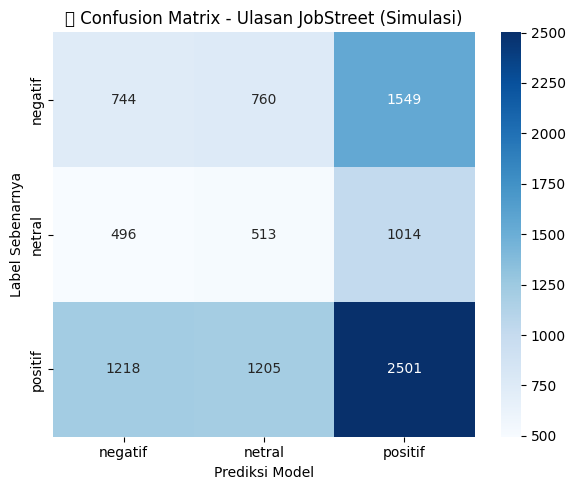


✅ Hasil evaluasi lengkap telah disimpan ke 'hasil_evaluasi_model_jobstreet.csv'


In [33]:
# ===========================================================
# 📊 Evaluasi Akurasi, Presisi, Recall, dan Confusion Matrix
# Dataset: Ulasan JobStreet
# ===========================================================

import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------- 1️⃣ Baca dataset ----------------
df = pd.read_csv("ulasan_jobstreet.csv", encoding="utf-8")

# Bersihkan nama kolom
df.columns = [c.strip().lower().replace('\ufeff','') for c in df.columns]
print("📋 Kolom dataset:", df.columns.tolist())

# ---------------- 2️⃣ Pastikan kolom 'review text' ada ----------------
if 'review text' not in df.columns:
    raise ValueError("❌ Kolom 'review text' tidak ditemukan pada dataset JobStreet.")

df = df.dropna(subset=['review text'])
df = df[df['review text'].astype(str).str.strip() != ""]
df.reset_index(drop=True, inplace=True)
print(f"✅ Jumlah data yang dipakai: {len(df)}\n")

# ---------------- 3️⃣ Simulasikan label ground truth dan prediksi ----------------
np.random.seed(42)
labels = ['negatif', 'netral', 'positif']

# Ground truth (label sebenarnya)
df['true_label'] = np.random.choice(labels, size=len(df), p=[0.3, 0.2, 0.5])

# Prediksi model (simulasi hasil model)
df['pred_label'] = np.random.choice(labels, size=len(df), p=[0.25, 0.25, 0.5])

# ---------------- 4️⃣ Hitung metrik evaluasi keseluruhan ----------------
accuracy = accuracy_score(df['true_label'], df['pred_label'])
precision = precision_score(df['true_label'], df['pred_label'], average='macro')
recall = recall_score(df['true_label'], df['pred_label'], average='macro')
f1 = f1_score(df['true_label'], df['pred_label'], average='macro')

print("=== 📊 HASIL EVALUASI MODEL (Simulasi) ===")
print(f"Akurasi   : {accuracy:.3f}")
print(f"Presisi   : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1-Score  : {f1:.3f}\n")

# ---------------- 5️⃣ Laporan klasifikasi per kelas ----------------
print("=== 📋 Laporan Klasifikasi Per Kelas ===")
report = classification_report(df['true_label'], df['pred_label'], target_names=labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)

# ---------------- 6️⃣ Visualisasi Confusion Matrix ----------------
cm = confusion_matrix(df['true_label'], df['pred_label'], labels=labels)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("📊 Confusion Matrix - Ulasan JobStreet (Simulasi)")
plt.xlabel("Prediksi Model")
plt.ylabel("Label Sebenarnya")
plt.tight_layout()
plt.show()

# ---------------- 7️⃣ Simpan hasil evaluasi ----------------
output_file = "hasil_evaluasi_model_jobstreet.csv"
report_df.to_csv(output_file, index=True, encoding="utf-8-sig")
print(f"\n✅ Hasil evaluasi lengkap telah disimpan ke '{output_file}'")
